# Puzzle

https://thefiddler.substack.com/p/happy-almost-new-year-from-the-fiddler-027

**This Week’s Fiddler**

From Dean Ballard comes the perfect puzzle to usher in 2026:

A magic square is a square array of distinct natural numbers, where each row, each column, and both long diagonals sum to the same “magic number.” 
...
A prime magic square is a magic square consisting of only prime numbers. Is it possible to construct a 4-by-4 prime magic square with a magic number of 2026? If so, give an example; if not, why not?

**This Week’s Extra Credit**

From Dean Ballard also comes some Extra Credit:

Find all values of N for which it is possible to construct an N-by-N prime magic square with a magic number of 2026. (Remember, the numbers in a magic square must all be distinct!)

# !! SOLUTION NOTE !!
Jump to the conclusion at the end for the tidy results.

*I have retained all my work, largely in the order in which it happened, to show / remember things as they happened, not overly polished and cleaned up. But it won't make for the smoothest reading, since there are many digressions and dead ends.*

# Fiddler Search 1 - Unsuccessful

No clever ideas so far. I am going to write some code (accelerated by github copilot) and see what happens.

Actually a few mildly useful thoughts.

* 2 cannot be part of the set since rows/cols including 2 will be odd, and rows/cols not including 2 will be even.
* It's probably better to build up the magic square in steps than to try to brute-force search all possible squares, which may take way too long.

Actually, the difficulty of this problem has forced some cleverer ideas.

* There are 305 primes below 2026.
* There are 90175 ways of pick 4 of those primes to add up to 2026. I call these potential rows.
* It's hard to test all 90k choose 4 combinations of rows to make up a random square, but it is easy to use random sampling to find combinations of potential rows that all use different numbers.
* Trying to rearrange such a combination into a magic square yielded no successes.
* A better way to approach that is to pick up number from each row and see if that can add up to the magic sum. This is much faster than trying all possible permutations because there are only 4^4 = 256 options to test. There should be at least 6 different ways to add up numbers from the rows into columns, corresponding to the 4 columns + 2 diagonals that we want.
* An even better approach is to pick n-1 rows, and search all possible elements for an nth row that will add up to the magic sum with some elements from the first 3 rows, and then pick a 4th row that is within that set of possible elements.

All of this yields 0 successes, so I am starting to wonder if a solution is not possible.

In [2]:
def odd_primes_up_to(n):
    """Return a list of all odd prime numbers up to n (inclusive)."""
    if n < 3:
        return []
    
    sieve = [True] * (n + 1)
    sieve[0] = sieve[1] = False  # 0 and 1 are not prime numbers
    
    for i in range(2, int(n**0.5) + 1):
        if sieve[i]:
            for j in range(i*i, n + 1, i):
                sieve[j] = False
                
    return [i for i in range(3,n + 1) if sieve[i]]

odd_primes_to_2026 = odd_primes_up_to(2026)
print(f"Odd primes up to 2026: {len(odd_primes_to_2026)} found.")
print(odd_primes_to_2026)


Odd primes up to 2026: 305 found.
[3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997, 1009, 1013, 1019, 1021, 1031, 1033, 1039, 1049, 1051, 1061, 1063, 1069, 1087, 1091, 1093, 1097, 1103, 1109, 1117, 1123, 1129, 1151, 1153, 1163, 1171, 1181, 1

In [3]:

def subsets_with_sum(nums, target_sum, target_len):
    """Alternative method to find all subsets of nums that sum to target_sum."""
    from itertools import combinations
    result = []
    for combo in combinations(nums, target_len):
        if sum(combo) == target_sum:
            result.append(list(combo))
    return result

quadruples_summing_to_2026 = subsets_with_sum(odd_primes_to_2026, 2026, 4)
print(f"Quadruples summing to 2026: {len(quadruples_summing_to_2026)} found.")
#import pprint
#pprint.pprint(quadruples_summing_to_2026)

Quadruples summing to 2026: 90175 found.


In [4]:
# Generate a histogram of the frequency of each prime in the quadruples
from collections import Counter
prime_frequency = Counter()
for quad in quadruples_summing_to_2026:
    prime_frequency.update(quad)

print("Prime frequency in quadruples summing to 2026:")
for prime, freq in prime_frequency.most_common():
    print(f"Prime {prime}: {freq} times")


Prime frequency in quadruples summing to 2026:
Prime 5: 3281 times
Prime 29: 3211 times
Prime 23: 3188 times
Prime 47: 3156 times
Prime 53: 3132 times
Prime 17: 3109 times
Prime 83: 3101 times
Prime 3: 3076 times
Prime 89: 3074 times
Prime 59: 3062 times
Prime 107: 2996 times
Prime 113: 2986 times
Prime 11: 2979 times
Prime 41: 2963 times
Prime 149: 2929 times
Prime 137: 2924 times
Prime 71: 2871 times
Prime 173: 2867 times
Prime 179: 2863 times
Prime 167: 2811 times
Prime 197: 2785 times
Prime 131: 2764 times
Prime 239: 2720 times
Prime 101: 2691 times
Prime 263: 2683 times
Prime 233: 2678 times
Prime 257: 2662 times
Prime 227: 2648 times
Prime 191: 2604 times
Prime 293: 2597 times
Prime 269: 2579 times
Prime 317: 2516 times
Prime 251: 2500 times
Prime 347: 2455 times
Prime 281: 2442 times
Prime 359: 2437 times
Prime 383: 2402 times
Prime 353: 2376 times
Prime 389: 2362 times
Prime 419: 2312 times
Prime 311: 2298 times
Prime 449: 2237 times
Prime 443: 2222 times
Prime 467: 2183 times


In [5]:
def lists_are_disjoint(list1, list2):
    """Check if two lists are disjoint."""
    for item in list1:
        if item in list2:
            return False
    return True

# This takes way too long to even get started with 90k sets to consider.
def mutually_exclusive_sets(sets, target_len):
    """Find all sets of mutually exclusive sets."""
    from itertools import combinations
    len_sets = len(sets)
    disjoint = [[False]*len_sets for _ in range(len_sets)]
    print("Pairwise exclusivity matrix initialized.")
    for i in range(len_sets):
        for j in range(i + 1, len_sets):
            if lists_are_disjoint(sets[i], sets[j]):
                disjoint[i][j] = True
                disjoint[j][i] = True
    print("Pairwise exclusivity matrix computed.")
    exclusive_sets_of_sets = []
    for combo in combinations(range(len_sets), target_len):
        if all(disjoint[i][j] for i in combo for j in combo if i != j):
            exclusive_sets_of_sets.append([sets[i] for i in combo])
    return exclusive_sets_of_sets

# Fast, random search for mutually exclusive sets.
def random_mutually_exclusive_sets(sets, target_len, trials=1000):
    """Randomly search for mutually exclusive sets."""
    import random
    len_sets = len(sets)    
    for _ in range(trials):
        combo = random.sample(range(len_sets), target_len)
        if all(lists_are_disjoint(sets[i], sets[j]) for i in combo for j in combo if i != j):
            joint_set = [sets[i] if (i%2==0) else list(reversed(sets[i])) for i in combo]
            yield joint_set

def directed_random_sets(domain, sets, target_len, trials=1000):
    """Randomly pick N-1 rows, and then try to pick a final row that is compatible."""
    import random 
    import itertools
    n = len(sets[0])
    magic_sum = sum(sets[0])
    len_sets = len(sets)
    for _ in range(trials):
        # First pick n-1 sets randomly
        combo_m1 = random.sample(range(len_sets), target_len-1)
        used_elements = set()
        for i in combo_m1:
            used_elements.update(sets[i])
        # Then look for possible values for the nth set              
        possible_nth_set_elements = []
        for idxs in itertools.combinations(range(n), n-1):
            needed_residual = magic_sum - sum(sets[combo_m1[i]][j] for i, j in enumerate(idxs))
            if needed_residual in domain and needed_residual not in used_elements:
                possible_nth_set_elements.append(needed_residual)

        
        if len(possible_nth_set_elements) >= n:
            #print ("----")
            #print(f"Chosen n-1 sets: {[sets[i] for i in combo_m1]}")
            #print(f"Possible nth set elements found: {len(possible_nth_set_elements)}")
            #print(possible_nth_set_elements)
            #print(len_sets, n)

            # search for a valid nth set
            for i in range(len_sets):
                candidate_nth_set = sets[i]
                for j in range(n):
                    if candidate_nth_set[j] not in possible_nth_set_elements:
                        break
                else:                
                    # found a valid nth set that works with the prior rows and also adds up to the magic sum.
                    print(f"Found valid nth set: {candidate_nth_set}")
                    combo = combo_m1 + [i]
                    # Combine the chosen sets
                    joint_set = [sets[i] if (i%2==0) else list(reversed(sets[i])) for i in combo]                
                    yield joint_set

candidates = []    
#for exclusive_set in random_mutually_exclusive_sets(quadruples_summing_to_2026, 4, trials=1000000):
    #print("Found mutually exclusive set:")
    #print(exclusive_set)
    # duplicates are unlikely with random sampling, so skip checking for duplicates, which takes a very long time..
    #candidates.append(exclusive_set)

for exclusive_set in directed_random_sets(odd_primes_to_2026, quadruples_summing_to_2026, 4, trials=10000):
    #print("Found mutually exclusive set:")
    #print(exclusive_set)
    # duplicates are unlikely with random sampling, so skip checking for duplicates, which takes a very long time..
    candidates.append(exclusive_set)

print(f"Mutually exclusive sets found: {len(candidates)}")

Mutually exclusive sets found: 0


e.g.
> Chosen n-1 sets: [[167, 181, 191, 1487], [29, 347, 401, 1249], [5, 277, 653, 1091]]
> Possible nth set elements found: 4
> [859, 421, 367, 353]

But it does not add up to the magic sum.

In [6]:
def set2d_has_potential(sq):
    """Check if a 2D set of rows has the potential to be a magic square."""
    import itertools
    n = len(sq)
    magic_sum = sum(sq[0])

    potential_columns = []
    for combo in itertools.combinations(range(n), n):
        if sum(sq[i][j] for i, j in enumerate(combo)) == magic_sum:
            potential_columns.append(combo)
    
    if len(potential_columns) >= (n + 2):
        return True
    return False

def set2d_is_a_magic_square(sq):
    """Check if a 2D set of numbers is a magic square."""
    n = len(sq)
    magic_sum = sum(sq[0])
    
    # Check columns
    for col in range(n):
        if sum(sq[row][col] for row in range(n)) != magic_sum:
            return False
    
    # Check diagonals
    if sum(sq[i][i] for i in range(n)) != magic_sum:
        return False
    if sum(sq[i][n - 1 - i] for i in range(n)) != magic_sum:
        return False

    # Check rows last because this should already be true.
    for row in sq:
        if sum(row) != magic_sum:
            return False
    
    return True

def sq_can_be_rearranged_into_magic_square(sq, num_trials=1000):
    """Check if a set of potential rows of N x N numbers can be rearranged into a magic square."""
    import random
    if not set2d_has_potential(sq):
        return False
    if (set2d_is_a_magic_square(sq)):
        return True
    new_sq = sq[:]
    for _ in range(num_trials):
        i = random.randint(0, len(sq) - 1)
        random.shuffle(new_sq[i])
        if set2d_is_a_magic_square(new_sq):
            print(f"Magic square found after {_} rearrangements.")
            print(new_sq)
            return True
    return False

for candidate in candidates:
    if sq_can_be_rearranged_into_magic_square(candidate, num_trials=100000):
        print("Candidate can be rearranged into a magic square:")
        print(candidate)

# Fiddler Attempt 2

I am not finding solutions by random or semi-random search, so I think the next step is to try something more organized and that will hopefully either solve the puzzle or prove it can't be done.

One thing to note is that a linear transformation applied to all terms in a magic square preserves the magic property. So, we could try to take a normal 4x4 magic square with terms 1 .. 16 and try to transform it into our desired square. But then we would have a arithmetic progression with 16 terms and all terms prime. It can be shown that in such a case, the common difference would need to be a multiple of all the primes less than 16 (else one of the 16 terms will be divisible by that prime). That means that the common difference is at least 2 * 3 * 5 * 7 * 11 * 13 = 30030. That would totally exceed the magic sum being 2026. So, this approach is ruled out. *[ For a more detailed explanation - this is related to a recent problem in the Aleph0 newsletter https://aleph0.substack.com/ - and the problem and solution are summarized here: https://latex-link-archive.lovable.app/newsletter-53 ]*

The only other approach I can think of is to try to fit the non-linear transformation described in Wikipedia to our situation: https://en.wikipedia.org/wiki/Magic_square#Transformations_that_preserve_the_magic_property :

    The numbers of a magic square can be substituted with corresponding numbers from a set of s arithmetic progressions with the same common difference among r terms, such that r × s = n2, and whose initial terms are also in arithmetic progression, to obtain a non-normal magic square. Here either s or r should be a multiple of n. Let us have s arithmetic progressions given by
    ...
    where a is the initial term, c is the common difference of the arithmetic progressions, and d is the common difference among the initial terms of each progression. The new magic constant will be

        M = n a + (n/2) [ ( r − 1 ) c + ( s − 1 ) d ] .

Actually, I am realizing that certain things can be proved directly from this equation, without invoking any code.

Plugging in M=2026 and n=4, we get:
2026 = 4a + 2 [ (r-1) c + (s-1) d ]

2026 is 2 mod 4, and 4a is 0 mod 4, so the other term must be 2 mod 4, i.e. the part in brackets [ (r-1) c + (s-1) d ] must be odd.

We can list this as a table

| r | s | Eqn | Comments |
|-|-|-|-|
| 16 | 1 | 15c | c must be odd |
| 8 | 2 | 7c + d | One of c or d, but not both must be odd |
| 4 | 4 | 3c + 3d | One of c or d, but not both must be odd |
| 2 | 8 | c + 7d | One of c or d, but not both must be odd |
| 1 | 16 | 15d | d must be odd |

So, we can see that at least one of c or d must always be odd to have the magic number of 2026.

a must be a odd prime since a is one of the terms in th table, and we already discussed that 2 doesn't work.

So, either a+c or a+d must be even and greater than 2. So, either a+c or a+d is not a prime.

So, this approach cannot yield a 4x4 magic square with magic constant 2026.

Thus, so far, we have eliminated 2 approaches:
* linear transformations of any known normal 4x4 magic square
* this particular arithmetic sequence based transformation of any known normal 4x4 magic square.

Stopping here for now. No more time.

# Extra Credit thoughts along the same lines.

Haven't really worked on this, but some thoughts.

| N | Comments |
|---|---|
| 1 | Trivial, but uninteresting |
| 2 | Not possible because of uniqueness constraint |
| 3 and other odd numbers | Sum of 3 odd primes would be odd, and so cannot be 2026 |
| 4 | See Fiddler discussion above |
| 6 | May be possible, but may need one to find 9 equally-spaced arithmetic sequences of length 6 among the 305 primes. This seems unlikely |
| 8 | Definitely not possible by the approaches discussed for the Fiddler, because the equation becomes M = 8a + 4 [...] which cannot be satisfied |
| 10, 12, 14 | Possible, but even less likely than 6 or 8 |
| 16 | Similar to 8 ... M = 16a + 8[...]. Also needs 256 numbers out of 305 |
| 18 and higher | Not possible, because 324 or more distinct numbers needed and we have only 305 primes under 2026 |


# Fiddler - Parity approach.

All odd primes are of form 4k+1 or 4k-1 (equivalently 4k+3). And our magic number if of the form 4k+2. I wonder if just checking that this magic square is possible modulo 4 is a good idea. It's definitely much easier to check because there are relatively few cases.

In [7]:
#moduli_of_interest = [4, 8, 12, 16]
moduli_of_interest = range(2, 25)
#moduli_of_interest = [6]
# Count how many primes are of form 4k+1 vs 4k+3
prime_types = {}
for modulus in moduli_of_interest:
    prime_types[modulus] = {}
    for p in odd_primes_to_2026:
        p_residue = p % modulus
        prime_types[modulus][p_residue] = prime_types[modulus].get(p_residue, 0) + 1
    print(f"Prime types by modulo {modulus}:", prime_types[modulus])

Prime types by modulo 2: {1: 305}
Prime types by modulo 3: {0: 1, 2: 154, 1: 150}
Prime types by modulo 4: {3: 157, 1: 148}
Prime types by modulo 5: {3: 79, 0: 1, 2: 78, 1: 74, 4: 73}
Prime types by modulo 6: {3: 1, 5: 154, 1: 150}
Prime types by modulo 7: {3: 53, 5: 54, 0: 1, 4: 50, 6: 52, 2: 48, 1: 47}
Prime types by modulo 8: {3: 79, 5: 79, 7: 78, 1: 69}
Prime types by modulo 9: {3: 1, 5: 54, 7: 50, 2: 50, 4: 52, 8: 50, 1: 48}
Prime types by modulo 10: {3: 79, 5: 1, 7: 78, 1: 74, 9: 73}
Prime types by modulo 11: {3: 30, 5: 30, 7: 33, 0: 1, 2: 32, 6: 30, 8: 32, 1: 27, 9: 30, 4: 30, 10: 30}
Prime types by modulo 12: {3: 1, 5: 77, 7: 79, 11: 77, 1: 71}
Prime types by modulo 13: {3: 26, 5: 25, 7: 26, 11: 24, 0: 1, 4: 25, 6: 24, 10: 25, 2: 28, 8: 26, 1: 25, 9: 26, 12: 24}
Prime types by modulo 14: {3: 53, 5: 54, 7: 1, 11: 50, 13: 52, 9: 48, 1: 47}
Prime types by modulo 15: {3: 1, 5: 1, 7: 39, 11: 39, 13: 39, 2: 39, 4: 37, 8: 39, 14: 36, 1: 35}
Prime types by modulo 16: {3: 39, 5: 38, 7: 

In [8]:
# check if a square is a magic square modulo n
def is_magic_square_mod_n(sq, n):
    """Check if a square is a magic square modulo n."""
    size = len(sq)
    magic_sum = sum(sq[0]) % n
    
    # Check rows
    for row in sq:
        if sum(row) % n != magic_sum:
            return False
    
    # Check columns
    for col in range(size):
        if sum(sq[row][col] for row in range(size)) % n != magic_sum:
            return False
    
    # Check diagonals
    if sum(sq[i][i] for i in range(size)) % n != magic_sum:
        return False
    if sum(sq[i][size - 1 - i] for i in range(size)) % n != magic_sum:
        return False
    
    return True

In [9]:
from itertools import combinations, product, chain
import pprint
magic_number = 2026
for modulus in moduli_of_interest:
    #print(f"Checking for magic squares modulo {modulus}:")
    possible_residues = []
    for k,v in prime_types[modulus].items():
        if v >= 1:
            possible_residues.append(k)
    possible_residues.sort()

    if (len(possible_residues) <= 5): # Don't bother if there are too many residues to consider.
        possible_rows = []
        for row in product(possible_residues, repeat=4):
            if sum(row) % modulus == magic_number % modulus:
                possible_rows.append(list(row))
        print(f" Modulus {modulus}: {len(possible_rows)} possible rows found using residues {possible_residues}.")

        # combinations is only here to speed things up, as product alone takes very long to hit a magic square.
        for candidate in chain.from_iterable([combinations(possible_rows, 4), product(possible_rows, repeat=4)]):
            #print(f"  Testing candidate: {candidate}")
            if is_magic_square_mod_n(candidate, modulus):
                excessive_usage = False
                # Check for excessive usage of any residue class
                for residue in possible_residues:
                    usage_count = sum(row.count(residue) for row in candidate)
                    if usage_count > prime_types[modulus][residue]:
                        excessive_usage = True
                        break
                if excessive_usage:
                    continue
                print(f"  Found candidate magic square mod {modulus}:")
                #pprint.pprint(candidate, width=20, indent=4)
                break
        else:
            print(f"  No candidate magic square found mod {modulus}. !!!!")

 Modulus 2: 1 possible rows found using residues [1].
  Found candidate magic square mod 2:
 Modulus 3: 27 possible rows found using residues [0, 1, 2].
  Found candidate magic square mod 3:
 Modulus 4: 8 possible rows found using residues [1, 3].
  Found candidate magic square mod 4:
 Modulus 5: 125 possible rows found using residues [0, 1, 2, 3, 4].
  Found candidate magic square mod 5:
 Modulus 6: 27 possible rows found using residues [1, 3, 5].
  Found candidate magic square mod 6:
 Modulus 8: 64 possible rows found using residues [1, 3, 5, 7].
  Found candidate magic square mod 8:
 Modulus 10: 125 possible rows found using residues [1, 3, 5, 7, 9].
  Found candidate magic square mod 10:
 Modulus 12: 104 possible rows found using residues [1, 3, 5, 7, 11].
  Found candidate magic square mod 12:


Okay, so this technique can't be used to disprove the existence of 4x4 magic square with a magic number == 2 mod 4.

Or using 2 .. 14 in a similar way.

# Fiddler Constraint Solver approach.

Okay, I am giving up on writing code myself, and going to try to use some professional code.

https://pypi.org/project/python-constraint/

In [10]:
def find_magic_square_using_constraint(magic_sum=2026, size=4, allowed_values=None, all_solutions=False):
    """Find a magic square using constraint satisfaction."""
    from constraint import Problem, AllDifferentConstraint, ExactSumConstraint

    if allowed_values is None:
        allowed_values = odd_primes_up_to(magic_sum)

    problem = Problem()

    # Define variables for each cell in the square
    for i in range(size):
        for j in range(size):
            problem.addVariable(f'cell_{i}_{j}', allowed_values)

    # Add constraints for rows
    for i in range(size):
        problem.addConstraint(ExactSumConstraint(magic_sum),
                              [f'cell_{i}_{j}' for j in range(size)])

    # Add constraints for columns
    for j in range(size):
        problem.addConstraint(ExactSumConstraint(magic_sum),
                              [f'cell_{i}_{j}' for i in range(size)])                              

    # Add constraints for diagonals
    problem.addConstraint(ExactSumConstraint(magic_sum),
                          [f'cell_{i}_{i}' for i in range(size)])
    problem.addConstraint(ExactSumConstraint(magic_sum),
                          [f'cell_{i}_{size - 1 - i}' for i in range(size)])

    # Add all-different constraint
    problem.addConstraint(AllDifferentConstraint())

    if all_solutions:
        solutions = problem.getSolutions()
        return solutions
    else:
        solution = problem.getSolution()
        return solution

#x = find_magic_square_using_constraint(2026, 4, odd_primes_to_2026, all_solutions=False)
#print(x)

This has been running for 72m without any solution. So, definitely not looking promising.

Oh, wait. After 675 minutes (i.e. 11+ hours), there is a solution. Let me write that down before it gets lost.

| | | | |
|-|-|-|-|
| 1979 | 3 | 13 | 31 |
| 23 | 7 | 1733 | 263 |
| 19 | 257 | 29 | 1721 |
| 5 | 1759 | 251 | 11 |



In [11]:
Fiddler_Answer = [
    [1979, 3, 13, 31],
    [23, 7, 1733, 263],
    [19, 257, 29, 1721],
    [5, 1759, 251, 11]
]

set2d_is_a_magic_square(Fiddler_Answer)

True

Grand that we have found one solution. 

That also explains why the disproof attempts did not get anywhere.

I wonder if there is an easier way to find this.

# Extra Credit Constraint Solver Approach

Let's see what we get.

We already know odd N doesn't work, and 18 or higher is too much.

Higher values of N could be easier because you have more options (N^2) relative to constraints (2N+2), or harder because we are reaching the limit of the finite set of primes we have to work with (305 primes).

In [12]:
#for n in [6, 8, 10, 12, 14, 16]:
#    x = find_magic_square_using_constraint(2026, n, odd_primes_to_2026, all_solutions=False)
#    print(f"{n}:", x)

This ran about 42 hours without finding a solution to the 6x6 case, and then I stopped it. Never mind. I don't want to tax my laptop this much. :)

# Other Libraries.

I am curious to try another library to see if it is faster.
https://developers.google.com/optimization/reference/python/sat/python/cp_model

In [13]:
def find_magic_square_with_ortools(magic_sum=2026, size=4, allowed_values=None):
    """Find a magic square using Google OR-Tools."""
    from ortools.sat.python import cp_model

    if allowed_values is None:
        allowed_values = odd_primes_up_to(magic_sum)

    model = cp_model.CpModel()

    # Define variables for each cell in the square
    cells = {}
    for i in range(size):
        for j in range(size):
            cells[(i, j)] = model.NewIntVarFromDomain(
                cp_model.Domain.FromValues(allowed_values), f'cell_{i}_{j}')

    # Add constraints for rows
    for i in range(size):
        model.Add(sum(cells[(i, j)] for j in range(size)) == magic_sum)

    # Add constraints for columns
    for j in range(size):
        model.Add(sum(cells[(i, j)] for i in range(size)) == magic_sum)

    # Add constraints for diagonals
    model.Add(sum(cells[(i, i)] for i in range(size)) == magic_sum)
    model.Add(sum(cells[(i, size - 1 - i)] for i in range(size)) == magic_sum)

    # Add all-different constraint
    model.AddAllDifferent([cells[(i, j)] for i in range(size) for j in range(size)])

    # Create a solver and solve the model
    solver = cp_model.CpSolver()
    status = solver.Solve(model)

    if status == cp_model.FEASIBLE or status == cp_model.OPTIMAL:
        solution = [[solver.Value(cells[(i, j)]) for j in range(size)] for i in range(size)]
        return solution
    else:
        return None

In [31]:
x = find_magic_square_with_ortools(2026, 4, odd_primes_to_2026)
print(x)
set2d_is_a_magic_square(x)

[[11, 13, 179, 1823], [283, 1733, 7, 3], [1583, 47, 239, 157], [149, 233, 1601, 43]]


True

Wow. Mind-blowing. This can solve the 4x4 square in 0 seconds. The python-constraint lib took 11+ hours, and they actually had magic square finding as an example on the website. And who knows how long my own code would have taken.

So, now we may actually have a chance to solve the extra credit.

In [15]:
import time
for n in [4, 6, 8]:
    start_time = time.time()
    x = find_magic_square_with_ortools(2026, n, odd_primes_to_2026)
    end_time = time.time()
    print(f"{n}: {end_time - start_time:.2f} seconds")
    if x is None:
        confirmation = None
    else:
        confirmation = set2d_is_a_magic_square(x)
    print(f"{n}: {confirmation}: {x}")

4: 0.04 seconds
4: True: [[11, 13, 179, 1823], [283, 1733, 7, 3], [1583, 47, 239, 157], [149, 233, 1601, 43]]
6: 0.11 seconds
6: True: [[43, 23, 449, 19, 1433, 59], [17, 3, 61, 7, 509, 1429], [53, 41, 919, 751, 11, 251], [5, 857, 37, 983, 13, 131], [1321, 83, 409, 73, 31, 109], [587, 1019, 151, 193, 29, 47]]
8: 6.23 seconds
8: True: [[41, 541, 653, 223, 47, 67, 5, 449], [19, 7, 29, 13, 1303, 239, 277, 139], [137, 733, 607, 227, 31, 3, 17, 271], [149, 101, 53, 11, 89, 797, 107, 719], [1087, 73, 59, 487, 43, 71, 97, 109], [113, 23, 37, 509, 83, 613, 521, 127], [163, 367, 199, 173, 251, 79, 643, 151], [317, 181, 389, 383, 179, 157, 359, 61]]


4,6,8 are solvable so far. 10,12,14,16 are unknown after about 4 hours of runtime.

<pre>
4: 0.07 seconds
4: True: [[11, 13, 179, 1823], [283, 1733, 7, 3], [1583, 47, 239, 157], [149, 233, 1601, 43]]
6: 0.20 seconds
6: True: [[1061, 5, 313, 103, 541, 3], [41, 13, 53, 109, 23, 1787], [181, 71, 353, 1151, 241, 29], [79, 1553, 359, 7, 17, 11], [281, 107, 691, 457, 443, 47], [383, 277, 257, 199, 761, 149]]
8: 37.57 seconds
8: True: [[211, 223, 3, 193, 241, 239, 53, 863], [233, 13, 197, 997, 199, 251, 23, 113], [229, 37, 179, 139, 1217, 191, 5, 29], [569, 107, 773, 163, 43, 157, 173, 41], [293, 149, 653, 409, 97, 151, 11, 263], [181, 1087, 131, 7, 103, 19, 167, 331], [227, 283, 31, 17, 47, 317, 1031, 73], [83, 127, 59, 101, 79, 701, 563, 313]]
8: 11.84 seconds
8: True: [[239, 1291, 7, 11, 5, 13, 179, 281], [43, 23, 971, 31, 227, 251, 37, 443], [3, 157, 199, 229, 311, 197, 71, 859], [113, 241, 223, 1163, 17, 29, 181, 59], [73, 167, 233, 191, 211, 911, 151, 89], [163, 19, 107, 173, 193, 41, 1277, 53], [263, 67, 149, 101, 953, 307, 47, 139], [1129, 61, 137, 127, 109, 277, 83, 103]]
</pre>

10 onwards are unsolvable, I am guessing. 

I have an idea as to how that might be proven.

 n    Desired Avg    Min Avg    Max Avg
 1        2026.00       3.00    2017.00
 2        1013.00       6.50    2007.50
 3         675.33      14.11    1995.44
 4         506.50      27.38    1965.25
 5         405.20      46.36    1929.56
 6         337.67      71.72    1883.61
 7         289.43     104.39    1830.71
 8         253.25     143.81    1773.06
 9         225.11     191.79    1710.56
10         202.60     246.78    1640.12
11         184.18     310.40    1562.19
12         168.83     381.92    1478.06
13         155.85     462.41    1388.09
14         144.71     550.67    1291.76
15         135.07     648.68    1190.96
16         126.62     755.37    1085.80
17         119.18     870.71     978.00


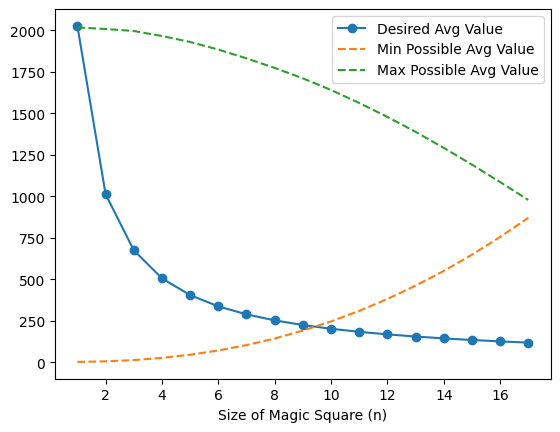

In [30]:
magic_number = 2026
ns = range(1,18)
desired_avg_values = [ 1.0 * magic_number / n for n in ns ]
min_avg_values = [sum(odd_primes_to_2026[0:n*n])/(n*n) for n in ns]
max_avg_values = [sum(odd_primes_to_2026[-(n*n):])/(n*n) for n in ns]
print(" n    Desired Avg    Min Avg    Max Avg")
for n, desired_avg, min_avg, max_avg in zip(ns, desired_avg_values, min_avg_values, max_avg_values):
    print(f"{n:2}   {desired_avg:12.2f}   {min_avg:8.2f}   {max_avg:8.2f}")

# plot the desired vs min avg values
import matplotlib.pyplot as plt
plt.plot(ns, desired_avg_values, label='Desired Avg Value', linestyle='-', marker='o')
plt.plot(ns, min_avg_values, label='Min Possible Avg Value', linestyle='--') 
plt.plot(ns, max_avg_values, label='Max Possible Avg Value', linestyle='--')
plt.xlabel('Size of Magic Square (n)')
plt.legend()
plt.show()

Ta-da. We can see that 10 onwards the desired average value (2026/N^2) is outside the range of possible average values given the set of numbers we are choosing from (odd primes below 2026).

# Conclusion

So, can we build a magic square of size NxN with magic sum 2026? Now, we know:

| N | Comments |
|---|---|
| 1 | Not possible because the single value would be 2026 which is not prime |
| 2 | Not possible because of uniqueness constraint |
| 3 and higher odd numbers | Sum of 3 odd primes would be odd, and so cannot be 2026, which is even |
| 4 | Possible, example below. |
| 6 | Possible, example below. |
| 8 | Possible, example below. |
| 10 | Not possible, because the desired average value (202.6) is lower the minimum possible average value using 100 odd primes (246.78) |
| 12, 14, 16 | Not possible, because similarly, the desired average value is lower than the min possible average value |
| 18 and higher | Not possible, because 324 or more distinct numbers needed and we have only 305 primes under 2026 |

**Example for N=4**:

| | | | |
|-|-|-|-|
|11| 13| 179| 1823| 
|283| 1733| 7| 3| 
|1583| 47| 239| 157| 
|149| 233| 1601| 43|

**Example for N=6**:
| | | | | | |
|-|-|-|-|-|-|
|1061| 5| 313| 103| 541| 3| 
|41| 13| 53| 109| 23| 1787| 
|181| 71| 353| 1151| 241| 29| 
|79| 1553| 359| 7| 17| 11| 
|281| 107| 691| 457| 443| 47| 
|383| 277| 257| 199| 761| 149|

**Example for N=8**:

| | | | | | | | |
|-|-|-|-|-|-|-|-|
|211| 223| 3| 193| 241| 239| 53| 863| 
|233| 13| 197| 997| 199| 251| 23| 113| 
|229| 37| 179| 139| 1217| 191| 5| 29| 
|569| 107| 773| 163| 43| 157| 173| 41| 
|293| 149| 653| 409| 97| 151| 11| 263| 
|181| 1087| 131| 7| 103| 19| 167| 331| 
|227| 283| 31| 17| 47| 317| 1031| 73| 
|83| 127| 59| 101| 79| 701| 563| 313|
